In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import calendar
#import prophet
from datetime import datetime

warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (10,8)

In [140]:
df = pd.read_csv("data/bikes.csv", index_col = 0 )

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [142]:
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
48,49,18-02-2018,spring,0,2,0,5,1,1,21.388347,25.59915,51.6667,17.749975,579,2348,2927
41,42,11-02-2018,spring,0,2,0,5,1,1,7.752731,10.67545,50.6364,7.272850,149,1597,1746
657,658,20-10-2019,winter,1,10,0,6,0,1,19.850847,23.64210,57.2917,7.874979,2806,5284,8090
519,520,04-06-2019,summer,1,6,0,1,1,1,24.497500,28.91415,48.7083,19.083811,1071,5927,6998
532,533,17-06-2019,summer,1,6,0,0,0,1,24.292500,28.59875,59.8750,9.708568,2634,4344,6978


- 1. En la columna yr, el 0 hace referencia a 2018 y el 1 2019 ---> cambiar a 2018 y 2019
- 2. Revisar estaciones segun meses - DONE  
- 3. Los dias de la semana pasarlos a str (texto)
- 4. Redondear temperaturas
- 5. Cambiar dteday a tipo daytime - DONE 
- 6. Comprobar festivos - columna holiday - 16 días - DONE
- 7. Los dias de la semana no corresponden con los que debieran ser - DONE
- 9. Librería calendar - dia de la semana DONE.
- 10. Chequear funcion seasons - DONE

Weathersit :
- 1: Sol y nubes
- 2: Niebla - nublado
- 3: Regulinchi
- 4: Tiempo chungo

In [143]:
df.duplicated().sum()

0

In [144]:
df.shape

(730, 16)

__________
Reasignamos columna season

In [145]:
#Cambiar columna 'dteday' a datatime

df.dteday =pd.to_datetime(df.dteday, dayfirst=True)

In [146]:
primavera = df[df['season']=='spring'] #Primavera 20 marzo - 21 junio
primavera['mnth'].unique()

array([ 1,  2,  3, 12])

In [147]:
invierno = df[df['season']=='winter'] # Invierno 21 de diciembre - 20 de marzo
invierno['mnth'].unique()

array([ 9, 10, 11, 12])

In [148]:
#Verano 21 junio - 23 septiembre 
verano = df[df['season']=='summer'] 
verano['mnth'].unique()

array([3, 4, 5, 6])

In [149]:
#Otoño 23 septiembre - 21 de diciembre
otoño = df[df['season']=='autumn'] 
otoño['mnth'].unique()

array([6, 7, 8, 9])

In [150]:
mapa_estaciones ={"spring": "winter", "winter": "autumn", "summer":"spring", "autumn":"summer"}

In [151]:
df["season"] = df["season"].map(mapa_estaciones)

In [152]:
#Primavera 21 marzo - 20 junio
#Verano 21 junio - 22 septiembre 
#Otoño 23 septiembre - 20 de diciembre
#Invierno 21 de diciembre - 20 de marzo

_________________

Ajustamos los días de la semana

In [153]:
def dia_semana(col):
    return col.isoweekday()

In [154]:
df["weekday"]= df["dteday"].apply(dia_semana)

__________


In [155]:
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [156]:
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [157]:
#festivos_18 = ["2018-01-01","2018-01-16", "2018-02-13", "2018-02-20", "2018-03-31", "2018-05-29", "2018-07-04", "2018-07-05", "2018-07-28" , "2018-09-04", "2018-10-23", "2018-10-24", "2018-12-24", "2018-12-25", "2018-12-31"]
#festivos_19 = ["2019-01-01","2019-01-16", "2019-02-13", "2019-02-20", "2019-03-31", "2019-05-29", "2019-07-04", "2019-07-05", "2019-07-28" , "2019-09-04", "2019-10-23", "2019-10-24", "2019-12-24", "2019-12-25", "2019-12-31"]

In [158]:
#df["holiday"] = df["dteday"].isin(["2018-01-01","2018-01-16", "2018-02-13", "2018-02-20", "2018-03-31", "2018-05-29", "2018-07-04", "2018-07-05", "2018-07-28" , "2018-09-04", "2018-10-23", "2018-10-24", "2018-12-24", "2018-12-25", "2018-12-31","2019-01-01","2019-01-16", "2019-02-13", "2019-02-20", "2019-03-31", "2019-05-29", "2019-07-04", "2019-07-05", "2019-07-28" , "2019-09-04", "2019-10-23", "2019-10-24", "2019-12-24", "2019-12-25", "2019-12-31"])
#df.sample(3)

In [159]:
#df.loc[df['holiday'] == False, 'holiday'] = 0
#df.loc[df['holiday'] == True, 'holiday'] = 1


In [160]:
df.sample(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
222,223,2018-08-11,summer,0,8,0,6,1,1,29.417500,32.57605,42.3750,11.041332,812,3980,4792
15,16,2018-01-16,winter,0,1,0,2,0,1,9.498347,11.71085,48.3750,12.625011,251,953,1204
651,652,2019-10-14,autumn,1,10,0,1,0,1,21.388347,25.41020,64.0417,18.667004,2080,4559,6639


In [161]:
df.holiday.unique()

array([0, 1])

In [162]:
#Sacamos ls festivos con la libreria 
from datetime import date
import holidays
  
us_holidays = holidays.US()
festivos_nuevo = []
for i in holidays.US(years = [2018, 2019], state = 'WA').items():
    festivos_nuevo.append(i)


In [163]:
#Creamos una lista con los festivos que faltan de la lista proporcionada por la empresa 
festivos_añadir = ['2018-02-13', '2018-03-31', '2018-07-05', '2018-07-28', '2018-11-24', '2018-12-24','2018-12-31', '2019-11-29', '2019-02-13' , '2019-03-31', '2019-07-05'
,'2019-07-28' , '2019-12-24' , '2019-12-31']

In [164]:
#Apendeamos la lista
in_holidays = holidays.HolidayBase()
in_holidays.append(festivos_añadir)

In [165]:
#Convertimos a diccionario para poder añadirlo a las vacaciones que teniamos 
dict_holidays = dict(festivos_nuevo)

In [166]:
in_holidays.update(dict_holidays)

In [167]:
lista_festivos = list(in_holidays.keys())


In [168]:
len(lista_festivos)

35

In [169]:
print(lista_festivos)

[datetime.date(2018, 2, 13), datetime.date(2018, 3, 31), datetime.date(2018, 7, 5), datetime.date(2018, 7, 28), datetime.date(2018, 11, 24), datetime.date(2018, 12, 24), datetime.date(2018, 12, 31), datetime.date(2019, 11, 29), datetime.date(2019, 2, 13), datetime.date(2019, 3, 31), datetime.date(2019, 7, 5), datetime.date(2019, 7, 28), datetime.date(2019, 12, 24), datetime.date(2019, 12, 31), datetime.date(2018, 1, 1), datetime.date(2018, 1, 15), datetime.date(2018, 2, 19), datetime.date(2018, 5, 28), datetime.date(2018, 7, 4), datetime.date(2018, 9, 3), datetime.date(2018, 10, 8), datetime.date(2018, 11, 11), datetime.date(2018, 11, 12), datetime.date(2018, 11, 22), datetime.date(2018, 12, 25), datetime.date(2019, 1, 1), datetime.date(2019, 1, 21), datetime.date(2019, 2, 18), datetime.date(2019, 5, 27), datetime.date(2019, 7, 4), datetime.date(2019, 9, 2), datetime.date(2019, 10, 14), datetime.date(2019, 11, 11), datetime.date(2019, 11, 28), datetime.date(2019, 12, 25)]


In [170]:
df["holiday"] = df["dteday"].isin(lista_festivos)
df.sample(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
172,173,2018-06-22,summer,0,6,False,5,1,1,30.066653,34.69145,70.7500,11.541554,661,3846,4507
454,455,2019-03-31,spring,1,3,True,7,0,2,17.390847,21.08540,73.8333,16.791339,2301,3934,6235
724,725,2019-12-26,winter,1,12,False,4,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441


In [171]:
df.loc[df['holiday'] == False, 'holiday'] = 0
df.loc[df['holiday'] == True, 'holiday'] = 1

In [172]:
df.holiday.value_counts()

0    695
1     35
Name: holiday, dtype: int64

In [173]:
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
342,343,2018-12-09,autumn,0,12,0,7,1,1,11.924153,15.8771,69.5833,5.542019,261,3359,3620
299,300,2018-10-27,autumn,0,10,0,6,1,2,19.270000,22.8523,81.2917,13.250121,240,2419,2659
409,410,2019-02-14,winter,1,2,0,4,1,2,13.085847,16.6973,50.8750,9.458993,135,3787,3922
716,717,2019-12-18,autumn,1,12,0,3,1,1,16.844153,20.4854,66.6250,14.834068,433,5124,5557
414,415,2019-02-19,winter,1,2,0,2,0,2,11.480000,13.2894,51.5833,16.958504,618,2071,2689



---


In [175]:
def workingday (col_holiday, col_weekday):
    if col_holiday == 1:
        return 'NO'
    elif col_weekday == 6 or col_weekday == 7:
        return 'NO'
    else:
        return 'SI'

In [176]:
df['workingday'] = df.apply(lambda brocoli: workingday(brocoli['holiday'], brocoli['weekday']), axis = 1)

In [179]:
df.to_csv('data/01_bikes_limpieza.csv')

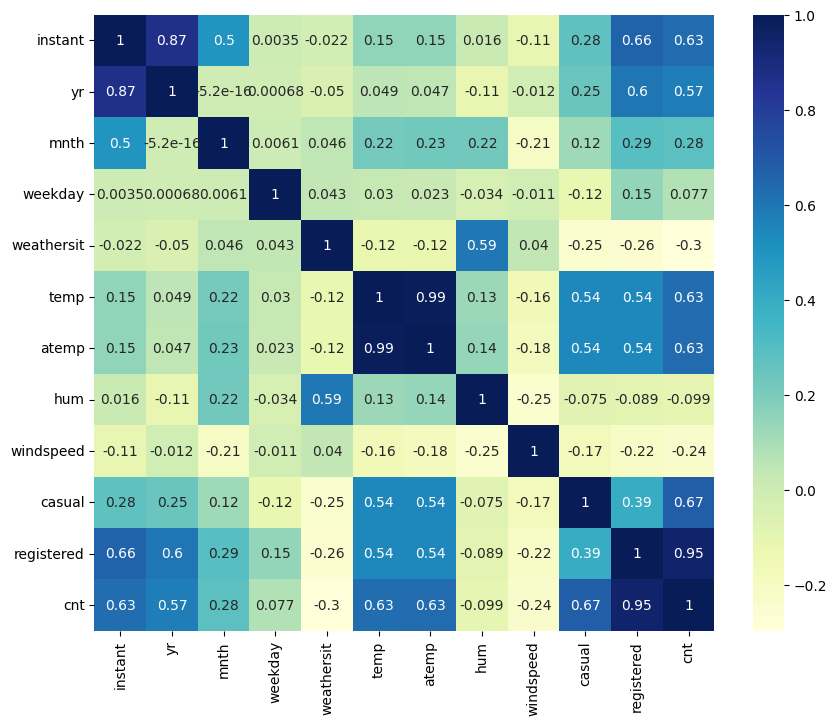

In [178]:
sns.heatmap(df.corr(), 
            cmap = "YlGnBu", 
           annot = True);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa